In [ ]:
# Page 125 of Python for Algorithmic Trading from idea to cloud deployment 
# Machine Learning
# Linear Regression

In [1]:
import os 
import random 
import numpy as np 
from pylab import mpl, plt 

plt.style.use('seaborn') 
mpl.rcParams['savefig.dpi'] = 300 
mpl.rcParams['font.family'] = 'serif' 
os.environ['PYTHONHASHSEED'] = '0'


In [11]:
x = np.linspace(0, 10)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [3]:
def set_seeds(seed=100): 
    random.seed(seed) 
    np.random.seed(seed) 
   
set_seeds()

In [4]:
y = x + np.random.standard_normal(len(x))

In [24]:
reg = np.polyfit(x, y, deg=1)
reg

array([0.94612934, 0.22855261])

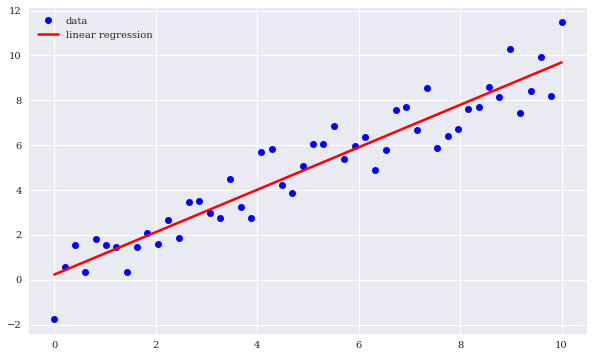

In [40]:
# Plotting the Calculated Regression for available data
plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'bo', label='data') 
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5, label='linear regression') 
plt.legend(loc=0);

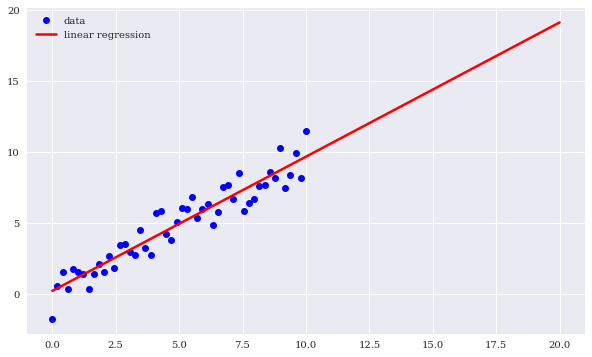

In [41]:
# Now, Prediction or EXtrapolation 
plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'bo', label='data') 

xn = np.linspace(0, 20) 
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5, label='linear regression') 
plt.legend(loc=0);

# After ploting the line, we plot the new incoming data and measure the accuracy 
# of preduction my RMSE (Root Mean Square Error) and then accordingly adjust the 
# weights in our ML algorithm 

    PLaying with Vectors & Matrices NOW

In [42]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [43]:
lags = 3 # no. of days as input to calculate the future price 
          # in other words, it represents the three different independent variables for regression 
          # In the above array e.g, 0,1,2 are independent variables & 3 is dependent and so on
          # 1,2,3 independent & 4 dependent 
          # 2,3,4 ind, 5 dep .......

In [68]:
m = np.zeros((lags + 1, len(x) - lags))
#print(m,x)
m[lags] = x[lags:]
#print(m,x)
for i in  range(lags):
    m[i] = x[i:i-lags]
#print(i,m,x)

In [69]:
m.T
# IN this transposed array, first 3 columns represent 3 independent variables
# 4th column is vector b   for equation A.x = b (Linear equation where A is matrix and x & b are vectors )
# Now, Linear regression will reveal value of dependent variable vector x 
# Due to more than one independent variables, functions np.polyfit() and np.polyval() don't work.

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [75]:
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]
print(m[:lags].T)
print(m[lags])
reg

[[ 0.  1.  2.]
 [ 1.  2.  3.]
 [ 2.  3.  4.]
 [ 3.  4.  5.]
 [ 4.  5.  6.]
 [ 5.  6.  7.]
 [ 6.  7.  8.]
 [ 7.  8.  9.]
 [ 8.  9. 10.]]
[ 3.  4.  5.  6.  7.  8.  9. 10. 11.]


array([-0.66666667,  0.33333333,  1.33333333])

In [76]:
np.dot(m[:lags].T, reg)
# The dot product yields the prediction results which in our case was the column 4 of our big m matrix.T
# So, the results confirm our prediction

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])